In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import matplotlib.colors as mcolors

from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import f_classif

In [163]:
clustered_data = pd.read_csv("clustered_data.csv")
silhouette_df = pd.read_csv("silhouette_df.csv")
significant_df = pd.read_csv("significant_features_results.csv")

In [171]:
pd.set_option('display.max_columns', 500)

In [75]:
colors = px.colors.sequential.Magma

def plot_2d(feature_1,feature_2,cluster_nr):
    plt.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1], clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2], c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"], cmap='viridis', alpha=0.7)
    plt.title(f'{feature_1} and {feature_2} with Cluster {cluster_nr}')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.colorbar(label=colors)
    plt.show()
    
def plot_3d(feature_1, feature_2, feature_3, cluster_nr):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_3], 
                         c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"],
                         alpha=0.7, cmap='viridis')

    # Adding labels and title
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_zlabel(feature_3)
    plt.title(f'{feature_1} and {feature_2} and {feature_3} with Cluster {cluster_nr}')
    plt.show()

In [159]:
def sil_Score(n_clusters, data, labels, sill_avg, sill_sample):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    silhouette_avg = sill_avg
    
    sample_silhouette_values = sill_sample

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for HDBSCAN clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

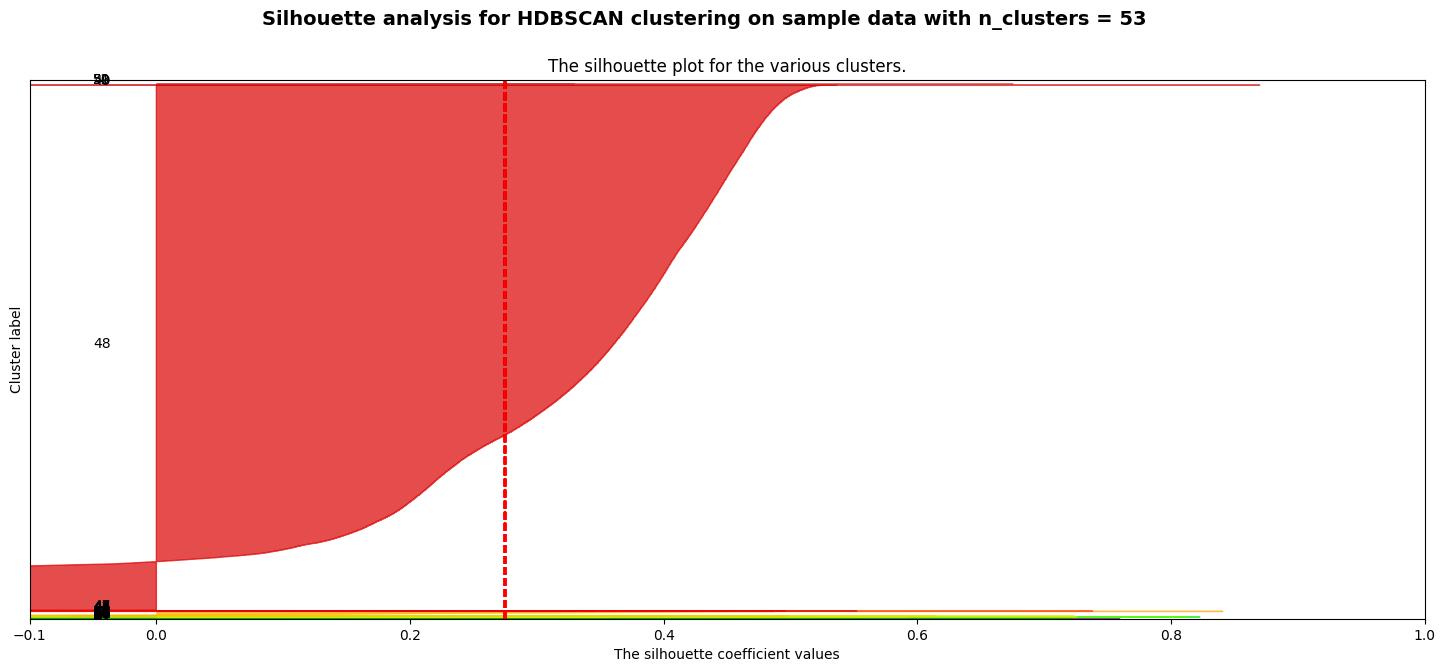

In [165]:
clustered_data = pd.read_csv("clustered_data.csv")
silhouette_df = pd.read_csv("silhouette_df.csv")

sillhouette_avg = silhouette_df.iloc[53].iloc[1]
sillhouette_samples = clustered_data["Silhouette"].to_numpy()
clusters_nr = len(clustered_data["Cluster"].unique())
labels = clustered_data["Cluster"]


sil_Score(n_clusters = clusters_nr, data = clustered_data, labels = labels, sill_avg = sillhouette_avg, sill_sample = sillhouette_samples)

In [93]:

silhouette_df = pd.read_csv("silhouette_df.csv")
print(silhouette_df)

grouped_significant_df = significant_df.groupby("Cluster")
for cluster, data in grouped_significant_df:
    print(f"Cluster {cluster} - Significant Features (p < 0.05):")
    print(data[["Feature", "Statistic", "P-value", "Test type"]])   
    print("\n" + "="*50 + "\n")


def signi_feature(cluster_number):
    filtered_significant_df = significant_df[significant_df['Cluster'].isin(cluster_number)]

    grouped_significant_df = filtered_significant_df.groupby("Cluster")
    for cluster, data in grouped_significant_df:
        print(f"Cluster {cluster} - Significant Features (p < 0.05):")
        print(data[["Feature", "Statistic", "P-value", "Test type"]])   
        print("\n" + "="*50 + "\n")
        

signi_feature([1])
signi_feature([1,2,3,4])
    

    Cluster  Average_Silhouette  Data Points
0        -1           -0.537178         2178
1         0            0.434683            7
2         1            0.193146           17
3         2            0.679306            5
4         3            0.050507           14
5         4            0.394982           10
6         5            0.202073           19
7         6            0.618495            5
8         7            0.414376           10
9         8            0.558063            5
10        9            0.267339           21
11       10            0.204461          103
12       11            0.432789           18
13       12            0.210967           30
14       13            0.645083            5
15       14            0.348886            6
16       15            0.415140           11
17       16            0.312155           51
18       17            0.650901            6
19       18            0.250754           23
20       19            0.401537           12
21       2

In [209]:
grouped_significant_df = significant_df.groupby("Cluster")
for cluster, data in grouped_significant_df:
    print(f"Cluster {cluster} - Significant Features (p < 0.05):")
    print(data[["Feature", "Statistic", "P-value", "Test type"]])   
    print("\n" + "="*50 + "\n")

Cluster -1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
90                    Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
91                    Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
92                            BMI    72.648836   0.000000e+00  ANOVA, F-test
93            Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
94              Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
95   Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
96        FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
97            General_Health_Fair    58.598155   1.933977e-14    Chi-Squared
98            General_Health_Poor    56.295972   6.234300e-14    Chi-Squared
99       General_Health_Very Good    64.501253   9.647099e-16    Chi-Squared
100   Checkup_5 or more years ago    13.516137   2.365207e-04    Chi-Squared
101  Checkup_Within the past y

In [210]:
print(silhouette_df["Average_Silhouette"].sort_values(ascending=False).head(5))
top_5 = silhouette_df["Average_Silhouette"].sort_values(ascending=False).head(5).index.tolist()


50    0.825404
43    0.807259
34    0.778048
31    0.758110
45    0.692212
Name: Average_Silhouette, dtype: float64


In [211]:
def signi_feature(cluster_number):
    filtered_significant_df = significant_df[significant_df['Cluster'].isin(cluster_number)]

    grouped_significant_df = filtered_significant_df.groupby("Cluster")
    for cluster, data in grouped_significant_df:
        print(f"Cluster {cluster} - Significant Features (p < 0.05):")
        print(data[["Feature", "Statistic", "P-value", "Test type"]])   
        print("\n" + "="*50 + "\n")

In [212]:
signi_feature([1])

Cluster 1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
307                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
308                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
309                           BMI    72.648836   0.000000e+00  ANOVA, F-test
310           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
311             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
312  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
313       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test




In [213]:
signi_feature(top_5)

Cluster 31 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
440                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
441                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
442                           BMI    72.648836   0.000000e+00  ANOVA, F-test
443           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
444             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
445  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
446       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test


Cluster 34 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
228                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
229                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
230                           BMI    72.648836   0.000000e+

In [214]:
def analys_cluster(cluster_nr):
    stat_num, df, stat_cat = [clustered_data[clustered_data["Cluster"] == cluster_nr].describe(),
               clustered_data[clustered_data["Cluster"] == cluster_nr],
               clustered_data[clustered_data["Cluster"] == cluster_nr].describe(include="bool")]
    return df,stat_num,stat_cat

Ex analys av cluster 0

In [18]:
df_0, stat_n_0, stat_cat_0 = analys_cluster(0)

In [173]:
df_0

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
96198,180.0,66.68,20.50,0.0,2.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,0,0.342158
158699,173.0,74.84,25.09,24.0,30.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.379338
186359,168.0,88.45,31.47,2.0,12.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.514334
209645,175.0,104.33,33.96,2.0,4.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,0,0.369522
263151,175.0,81.65,26.58,15.0,12.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,0,0.531806
270708,168.0,86.18,30.67,2.0,16.0,120.0,120.0,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0.529099
286101,183.0,72.57,21.70,4.0,30.0,120.0,120.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,0,0.376524


In [174]:
stat_n_0

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.0,7.0,7.000000
mean,174.571429,82.100000,27.138571,7.0,15.142857,120.0,120.0,0.0,0.434683
std,5.623082,12.467619,5.097736,9.0,11.246163,0.0,0.0,0.0,0.085580
min,168.000000,66.680000,20.500000,0.0,2.000000,120.0,120.0,0.0,0.342158
25%,170.500000,73.705000,23.395000,2.0,8.000000,120.0,120.0,0.0,0.373023
50%,175.000000,81.650000,26.580000,2.0,12.000000,120.0,120.0,0.0,0.379338
75%,177.500000,87.315000,31.070000,9.5,23.000000,120.0,120.0,0.0,0.521717
max,183.000000,104.330000,33.960000,24.0,30.000000,120.0,120.0,0.0,0.531806


In [172]:
stat_cat_0

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,2,1,2,2,1,2,1,2,2,1,1,2,2,2,1,1,2,1,1,2,2,2,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,6,7,6,4,7,6,7,6,5,7,7,6,5,6,7,7,6,7,7,6,5,4,7,7,7,7,7,7,7,6,4


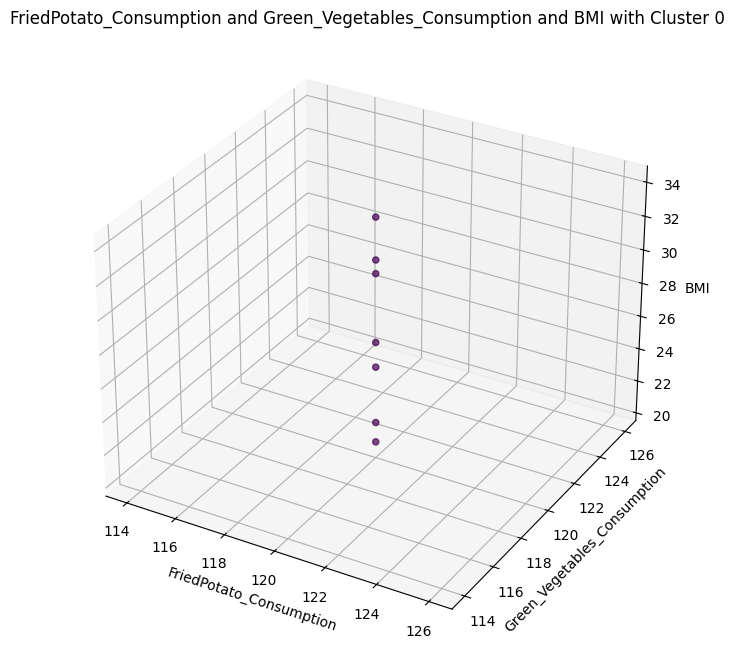

In [170]:
plot_3d("FriedPotato_Consumption","Green_Vegetables_Consumption","BMI",0)

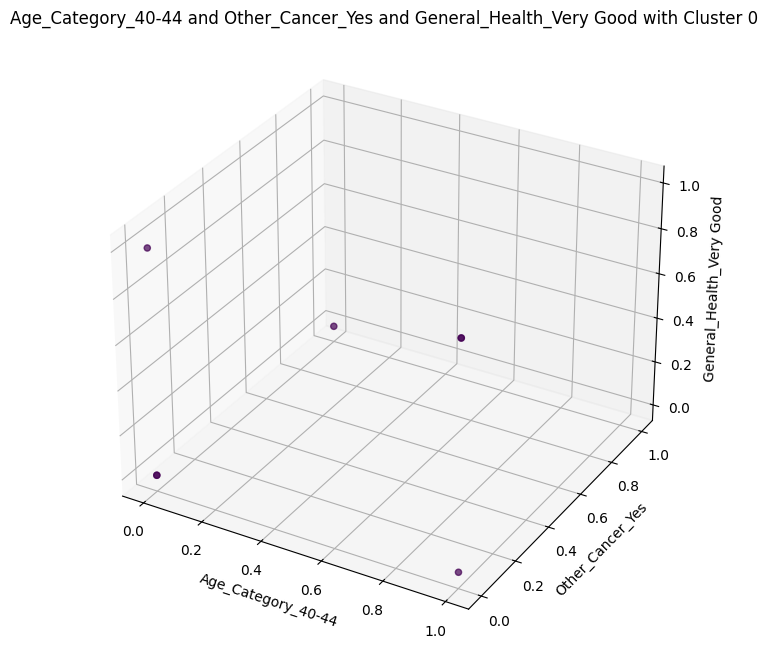

In [177]:
plot_3d("Age_Category_40-44","Other_Cancer_Yes","General_Health_Very Good",0)

Om vi kollar igenom datapunkterna för cluster 0 kan vi se att dem signifikanta pberoende variablerna framstår, 
- vi kan se att alla patienter har en speciell diet.
- dem äter väldigt mycket och majoriteten tränar.
- samt att deras hälsa är very good eller excellent.
- detta klustret innehåller oxå bara män
- en motgående faktor är att det finns en patient som är sjuk (cancer och Arthritis) 

In [259]:
def health_heatmap(df, columns):
    health_proportion = df[columns].apply(lambda x: x.value_counts(normalize=True).get(True, 0))

    # Plot the heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(health_proportion.to_frame().T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of True'})
    plt.title("Proportion of 'True' in General Health Features")
    plt.show()
    
def plot_dist(df,feature):
    health_distribution = df[feature].value_counts()

    # Plotting the distribution as a bar plot
    plt.figure(figsize=(8, 5))
    health_distribution.plot(kind='bar', color=["skyblue"])
    plt.title('Distribution of General Health Fair')
    plt.xlabel('General Health Fair')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [320]:
categorical_features = clustered_data.select_dtypes(include=['bool']).columns.tolist()
numerical_features = clustered_data.drop(categorical_features, axis=1).columns.tolist()

In [326]:
print(categorical_features)
print(numerical_features)
health_columns = categorical_features[:4]
print(health_columns)
checkup_column = categorical_features[4:8]
print(checkup_column)
conditions_columns = categorical_features[9:17]
print(conditions_columns)
profile_columns = [categorical_features[8], categorical_features[17], categorical_features[-1]]
print(profile_columns)
age_column = categorical_features[18:-1]
print(age_column)
food_column = numerical_features[3:-2]
print(food_column)
num_profile_column = numerical_features[:3]
print(num_profile_column)



['General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'General_Health_Very Good', 'Checkup_5 or more years ago', 'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years', 'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes', 'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Smoking_History_Yes']
['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Cluster', 'Silhouette']
['General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'G

In [289]:
print(len(age_column))

12


In [291]:
top_5

[50, 43, 34, 31, 45]

In [294]:
def get_excellent_health(df):
    temp = df
    count_false_health = temp[(temp['General_Health_Fair'] == False) & 
                              (temp['General_Health_Good'] == False) & 
                              (temp['General_Health_Very Good'] == False) & 
                              (temp['General_Health_Poor'] == False)].shape[0]
    print(count_false_health)
    
def get_18_24_age(df):
    temp = df
    count_false = temp[(temp[age_column[0]] == False) & 
                        (temp[age_column[1]] == False) & 
                        (temp[age_column[2]] == False) & 
                        (temp[age_column[3]] == False) & 
                        (temp[age_column[4]] == False) & 
                        (temp[age_column[5]] == False) & 
                        (temp[age_column[6]] == False) & 
                        (temp[age_column[7]] == False) & 
                        (temp[age_column[8]] == False) &
                        (temp[age_column[9]] == False) &
                        (temp[age_column[10]] == False) &
                        (temp[age_column[11]] == False)].shape[0]
    print(count_false)

In [188]:
top_5_cluster_info = []

for cluster in top_5:
    top_5_cluster_info.append(analys_cluster(cluster))

In [219]:
print(len(top_5_cluster_info),len(top_5_cluster_info[0]))

5 3


In [215]:
signi_feature([top_5[0]])

Cluster 50 - Significant Features (p < 0.05):
                         Feature    Statistic        P-value      Test type
76                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
77                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
78                           BMI    72.648836   0.000000e+00  ANOVA, F-test
79           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
80             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
81  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
82       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
83           General_Health_Good     7.961383   4.778588e-03    Chi-Squared
84                  Exercise_Yes     5.845158   1.561997e-02    Chi-Squared
85               Skin_Cancer_Yes     6.098646   1.352855e-02    Chi-Squared
86                 Arthritis_Yes     9.695649   1.847048e-03    Chi-Squared
87                      Sex_Male    12.151

In [216]:
top_5_cluster_info[0][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
155,165.0,79.38,29.12,4.0,30.0,90.0,0.0,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,50,0.311900
1404,170.0,88.45,30.54,5.0,30.0,90.0,2.0,False,True,False,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,50,0.259301
2134,163.0,60.33,22.83,0.0,4.0,90.0,2.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,50,-0.067507
2470,163.0,104.33,39.48,0.0,16.0,90.0,0.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,50,0.180445
2849,160.0,54.43,21.26,4.0,30.0,90.0,0.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,50,0.208717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303819,168.0,81.65,29.05,0.0,15.0,90.0,0.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,50,0.264885
305194,175.0,95.25,31.01,20.0,30.0,90.0,3.0,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,50,-0.076940
305579,160.0,54.43,21.26,7.0,20.0,90.0,4.0,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,50,0.122649
306268,188.0,117.93,33.38,0.0,8.0,90.0,3.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,50,0.044174


In [217]:
top_5_cluster_info[0][1]
#låg friedpotato consumption, 

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.0,650.000000
mean,169.007692,77.329569,27.043523,4.046154,21.278462,90.592308,3.478462,50.0,0.097216
std,9.358875,15.061463,4.690422,6.672462,11.348832,2.844442,3.636444,0.0,0.138496
min,145.000000,43.090000,17.230000,0.000000,0.000000,80.000000,0.000000,50.0,-0.418944
25%,163.000000,65.770000,23.675000,0.000000,12.000000,90.000000,0.000000,50.0,0.012243
50%,169.000000,77.110000,26.630000,1.000000,30.000000,90.000000,2.000000,50.0,0.120162
75%,175.000000,86.180000,29.927500,4.000000,30.000000,90.000000,4.000000,50.0,0.202563
max,196.000000,130.180000,43.640000,30.000000,40.000000,100.000000,16.000000,50.0,0.329274


In [313]:
top_5_cluster_info[0][0]["Green_Vegetables_Consumption"].value_counts()

Green_Vegetables_Consumption
90.0     568
99.0      41
96.0      21
80.0      12
88.0       3
95.0       2
84.0       1
100.0      1
92.0       1
Name: count, dtype: int64

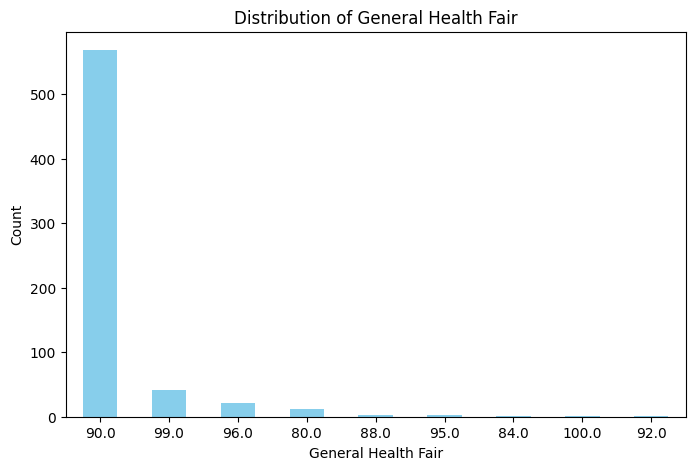

In [312]:
plot_dist(top_5_cluster_info[0][0],"Green_Vegetables_Consumption")

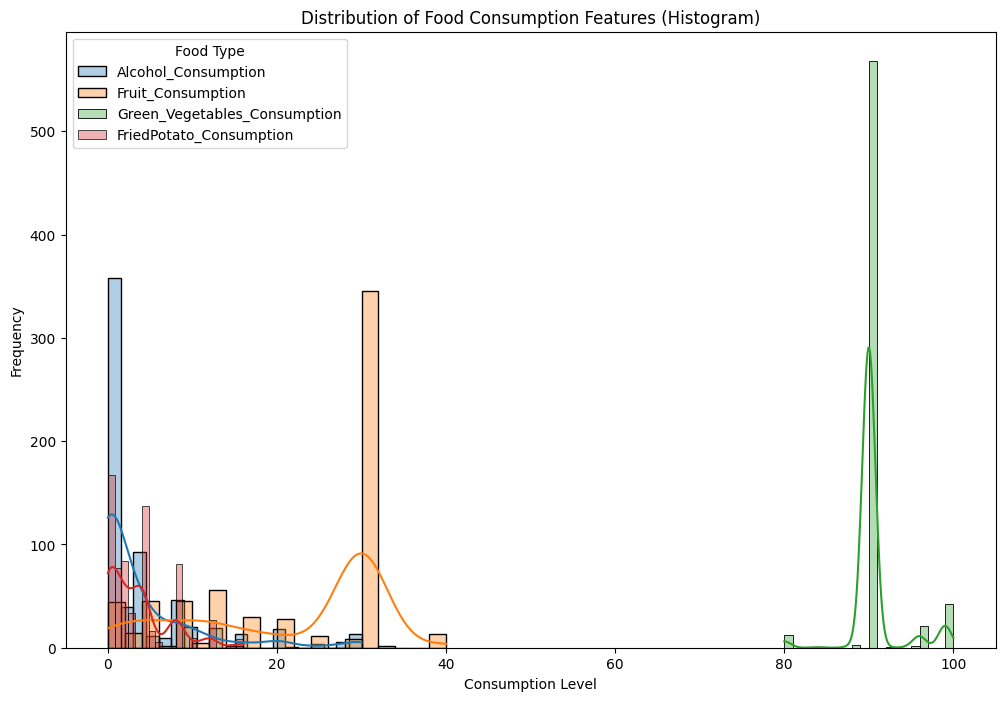

In [329]:
plt.figure(figsize=(12, 8))
for col in food_column:
    sns.histplot(top_5_cluster_info[0][0][col], kde=True, label=col, bins=20, alpha=0.35)

plt.title("Distribution of Food Consumption Features (Histogram)")
plt.xlabel("Consumption Level")
plt.ylabel("Frequency")
plt.legend(title="Food Type")
plt.show()

In [218]:
top_5_cluster_info[0][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,591,483,630,419,618,574,612,501,530,602,606,597,538,638,567,644,475,382,620,599,597,586,601,599,601,578,591,585,611,617,405


In [295]:
get_excellent_health(top_5_cluster_info[0][2])
# %males
print(1 - top_5_cluster_info[0][0]["Sex_Male"].sum()/(len(top_5_cluster_info[0][0])))
get_18_24_age(top_5_cluster_info[0][2])

1
0.5876923076923077
1


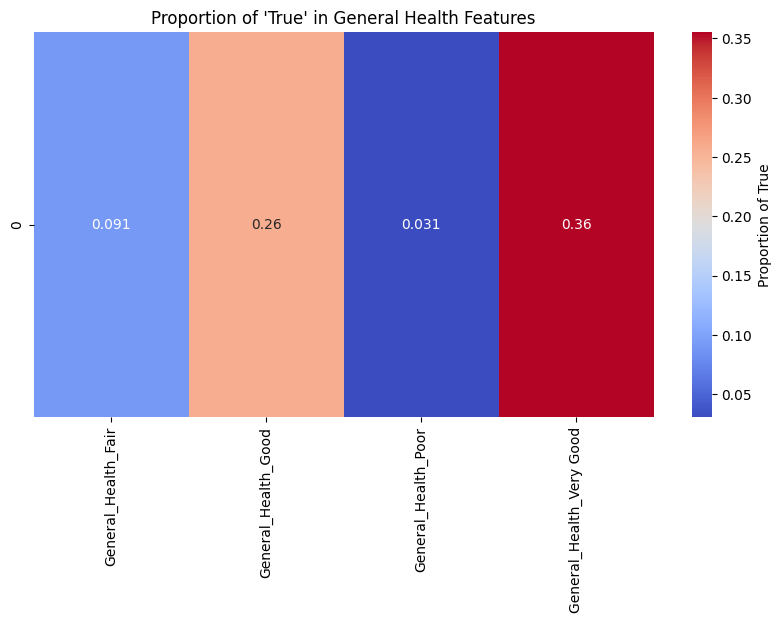

In [302]:
health_heatmap(top_5_cluster_info[0][0],health_columns)

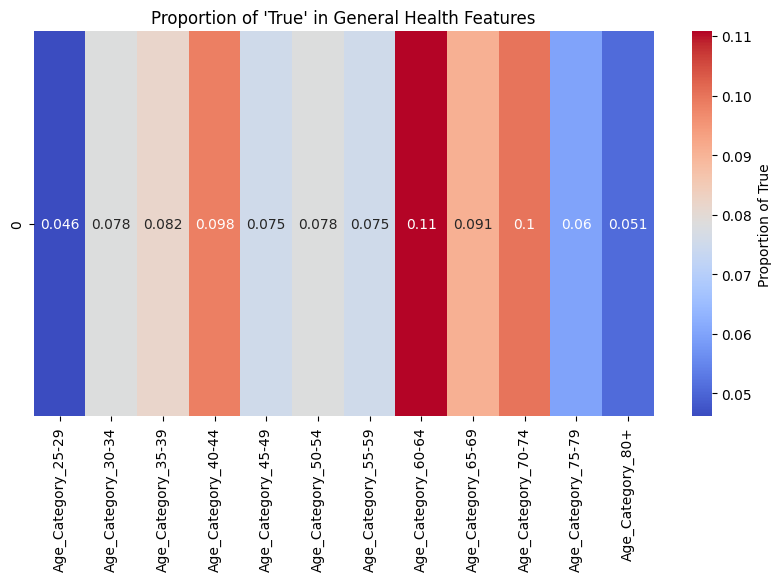

Age_Category_25-29    30
Age_Category_30-34    51
Age_Category_35-39    53
Age_Category_40-44    64
Age_Category_45-49    49
Age_Category_50-54    51
Age_Category_55-59    49
Age_Category_60-64    72
Age_Category_65-69    59
Age_Category_70-74    65
Age_Category_75-79    39
Age_Category_80+      33
dtype: int64


In [303]:
health_heatmap(top_5_cluster_info[0][0],age_column)
print(top_5_cluster_info[0][0][age_column].sum())
#quite evenly distrubuted

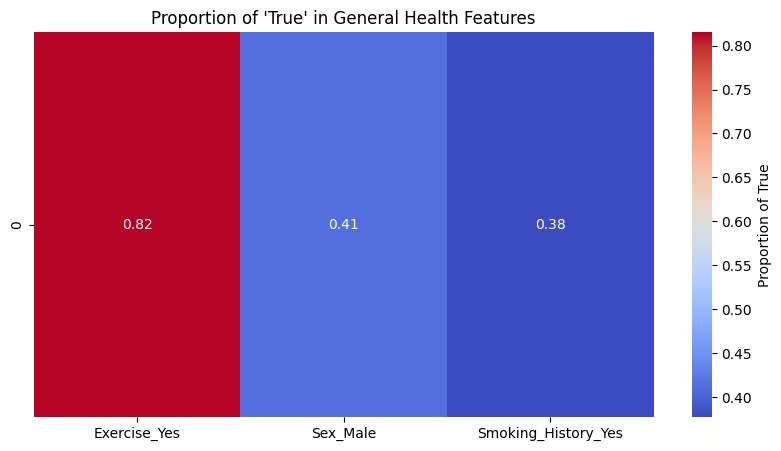

In [304]:
health_heatmap(top_5_cluster_info[0][0],profile_columns)

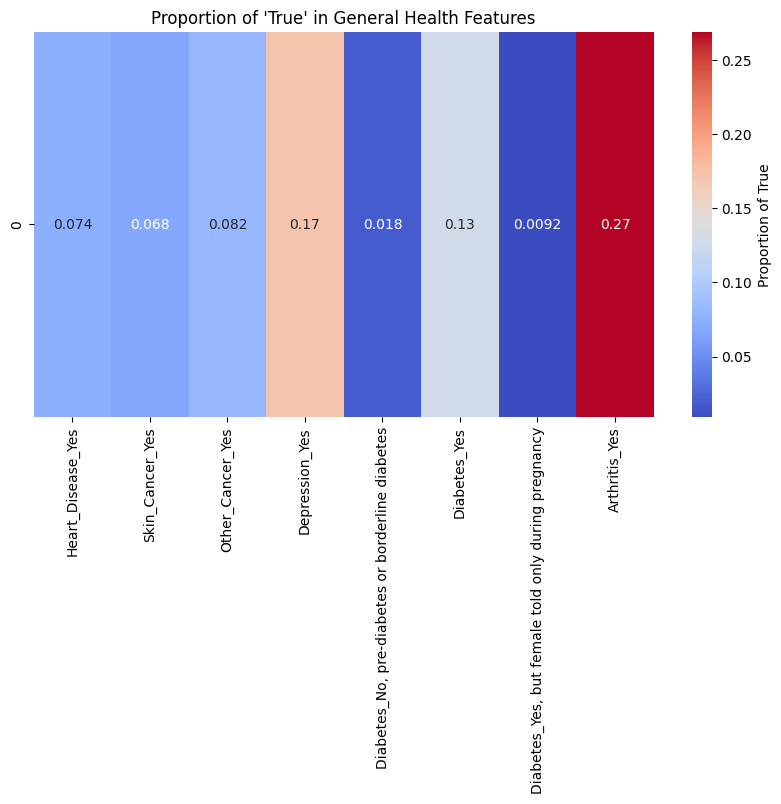

In [305]:
health_heatmap(top_5_cluster_info[0][0],conditions_columns)

This cluster suggest that majority of patient
- exercise (530 true) and had a checkup within the past year (501)
- This cluster also seems to be on a diet, most patient consume a lot of greens and majorite has a low alcohol consumption.
- we can also se that most people consider them self to have good or very good general health, but it is also worth noting that there was only 1 who considered them self with excellent health
- there is also more females than males (59%)
- females might say their health if very good rather than excellent even if it is excellent. Theory**

Overall Interpretation
The significant features for Cluster 50 indicate a distinct profile characterized by:

- Higher Consumption: Individuals in this cluster tend to have higher consumption of fruits, vegetables, and potentially lower fried food consumption.
- Health Indicators: There is a significant association with better general health and a higher prevalence of health issues such as arthritis and skin cancer.
- Demographic Profile: The cluster may be skewed towards a specific age group and gender (higher proportion of males).
- These findings suggest that Cluster 50 represents a group with unique health and dietary patterns, which could have implications for targeted health interventions or further research into lifestyle factors contributing to their health outcomes.